In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank-full.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
data[data.duplicated()].shape

(0, 17)

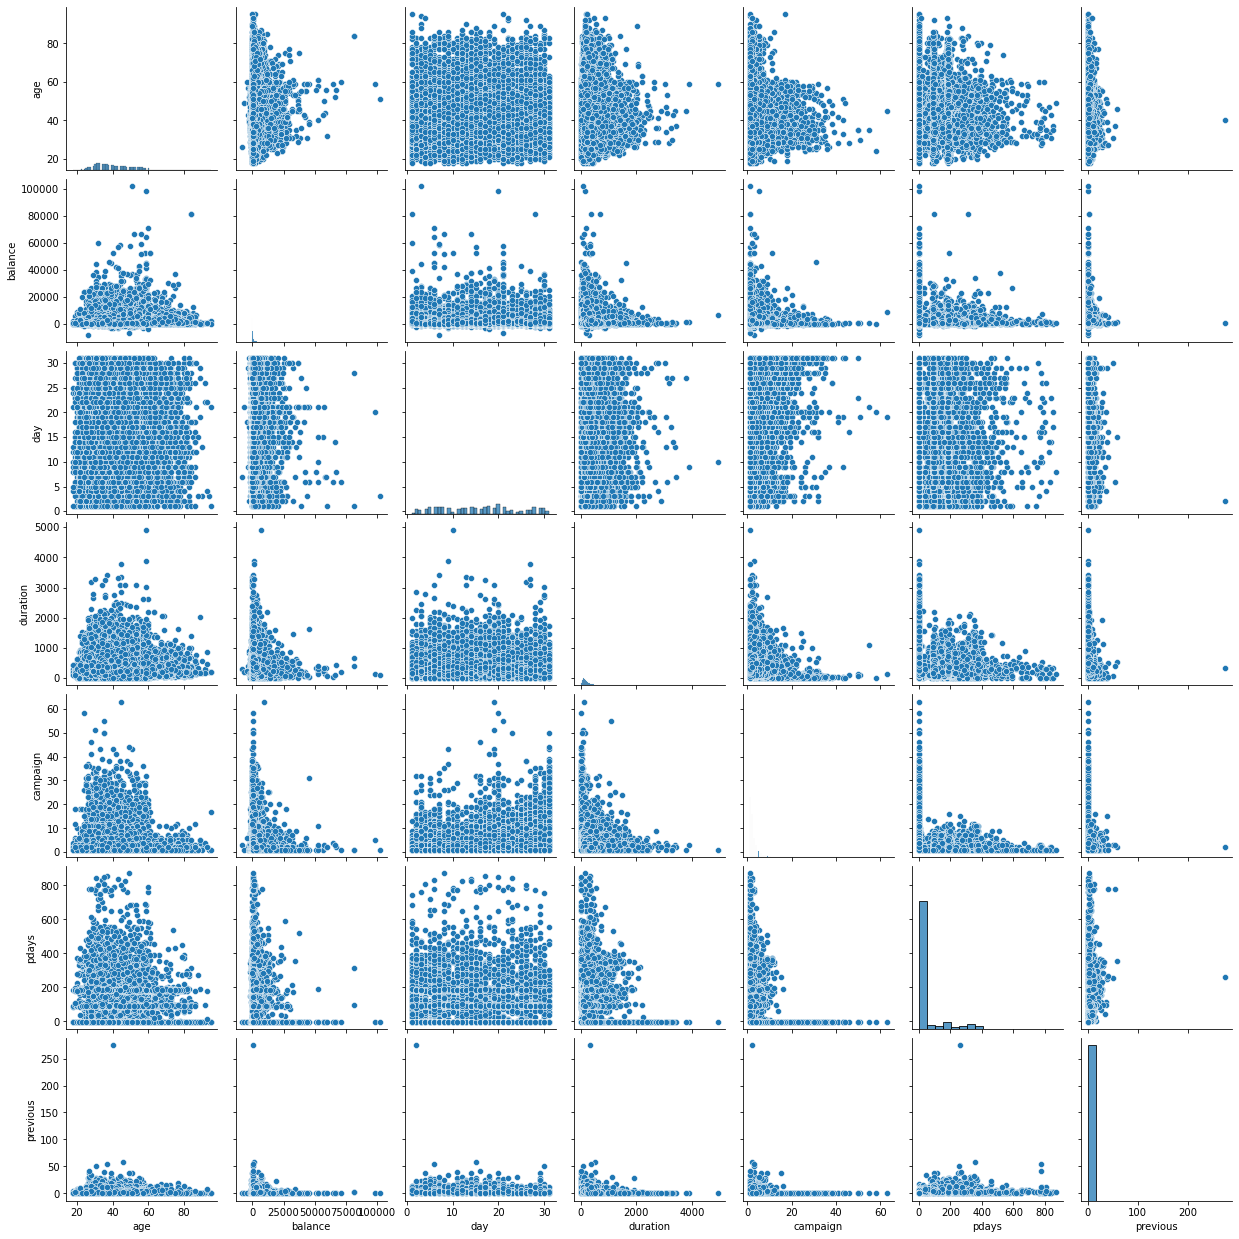

In [7]:
sns.pairplot(data)

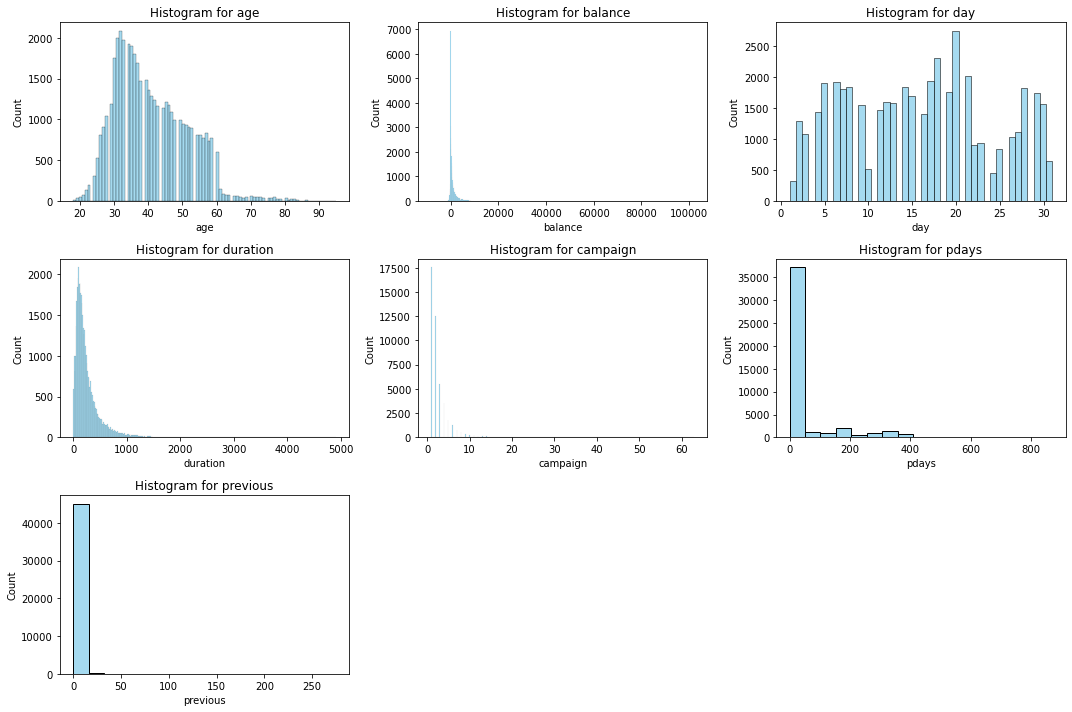

In [8]:
# Histogram for specified variables
plt.figure(figsize=(15, 10))

# Define the variables for the histogram
variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[variable], color='skyblue')
    plt.title(f'Histogram for {variable}')

plt.tight_layout()
plt.show()


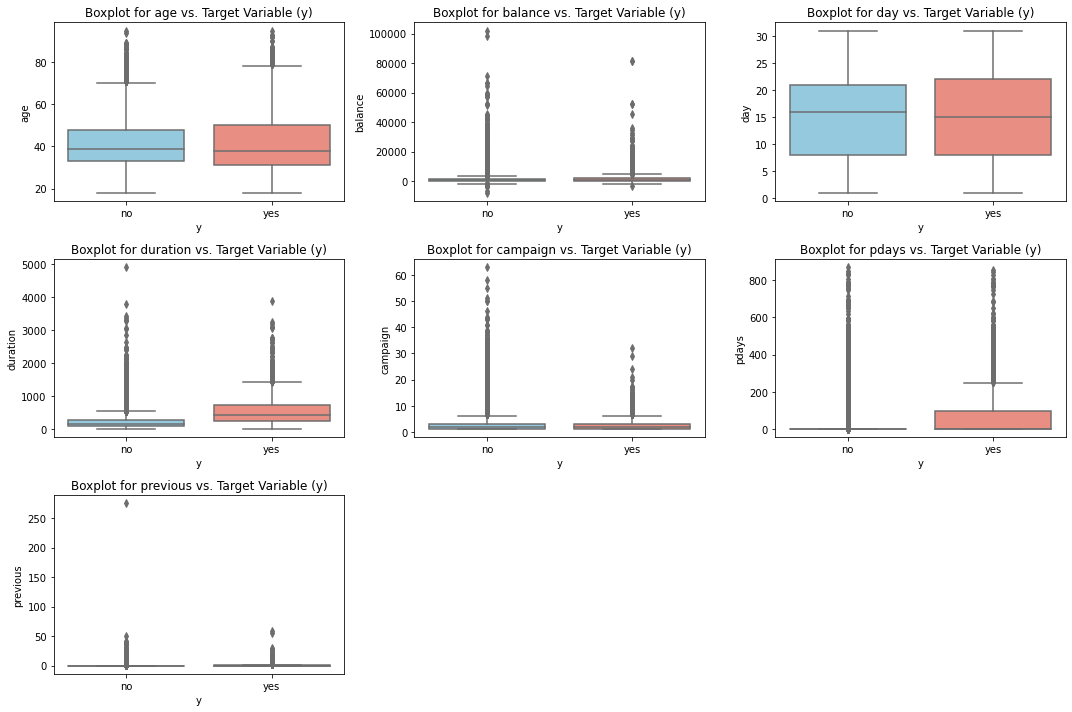

In [9]:
# Boxplot for specified variables
plt.figure(figsize=(15, 10))

# Define the variables for the boxplot
variables = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

for i, variable in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='y', y=variable, data=data, palette=['skyblue', 'salmon'])
    plt.title(f'Boxplot for {variable} vs. Target Variable (y)')

plt.tight_layout()
plt.show()

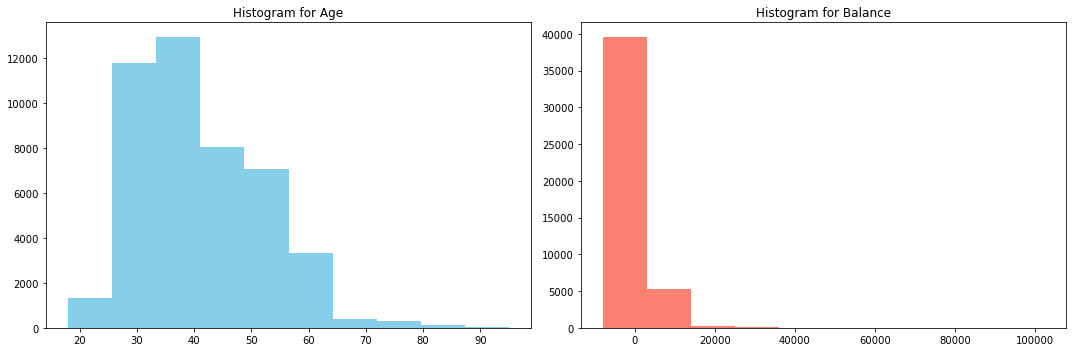

In [10]:
# Histogram for 'age' and 'balance'
plt.figure(figsize=(15, 5))

# Histogram for 'age'
plt.subplot(1, 2, 1)
plt.hist(data['age'], color='skyblue')
plt.title('Histogram for Age')

# Histogram for 'balance'
plt.subplot(1, 2, 2)
plt.hist(data['balance'], color='salmon')
plt.title('Histogram for Balance')

plt.tight_layout()
plt.show()

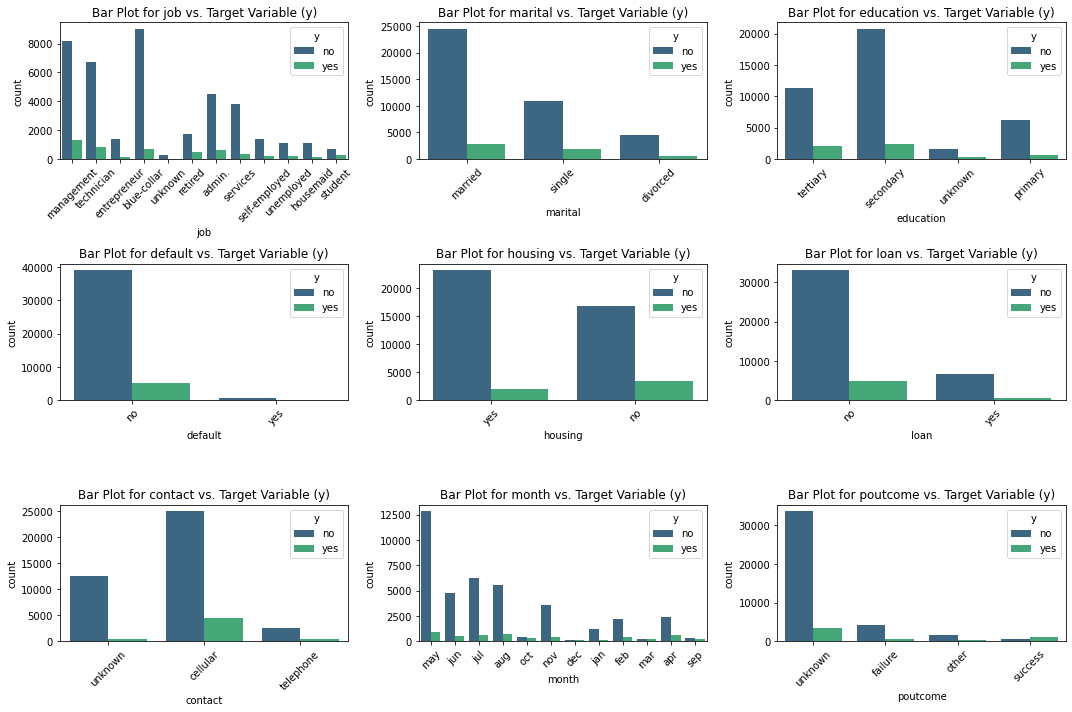

In [11]:
# Bar plots for specified categorical variables
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
num_categories = len(categorical_variables)

plt.figure(figsize=(15, 10))

for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=variable, data=data, hue='y', palette='viridis')
    plt.title(f'Bar Plot for {variable} vs. Target Variable (y)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

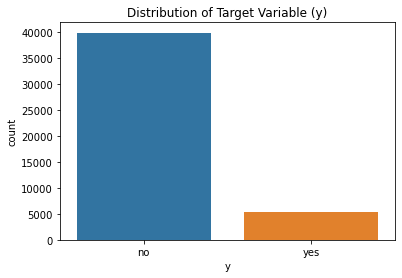

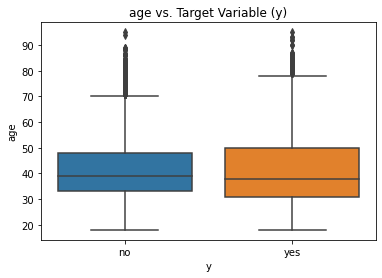

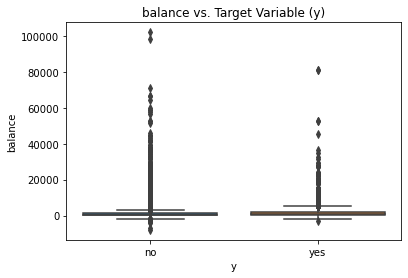

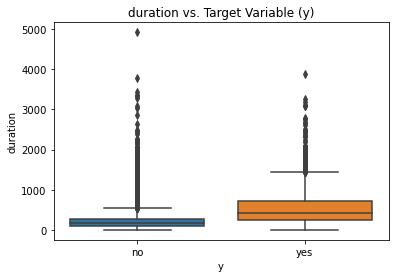

In [12]:
# Univariate analysis for the target variable 'y'
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable (y)')
plt.show()

# Univariate analysis for numerical variables
numerical_vars = ['age', 'balance', 'duration']

for var in numerical_vars:
    sns.boxplot(x='y', y=var, data=data)
    plt.title(f'{var} vs. Target Variable (y)')
    plt.show()

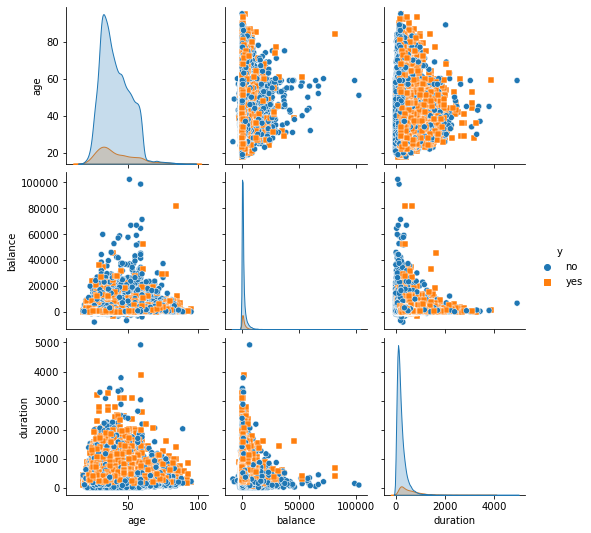

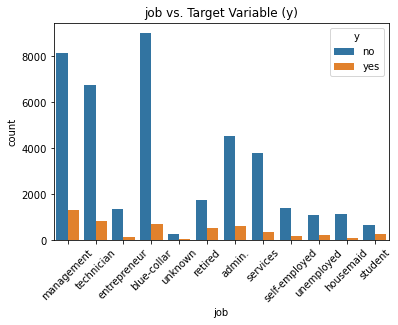

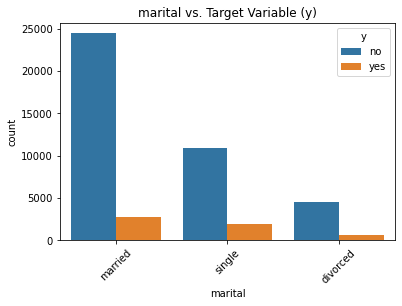

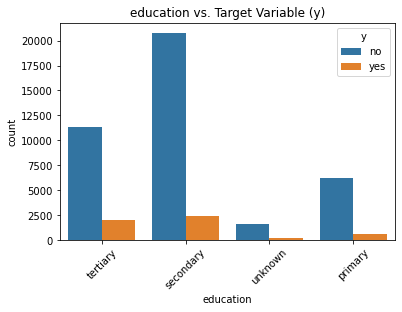

In [13]:
# Bivariate analysis for numerical variables
sns.pairplot(data[['age', 'balance', 'duration', 'y']], hue='y', markers=['o', 's'])
plt.show()

# Bivariate analysis for categorical variables
categorical_vars = ['job', 'marital', 'education']

for var in categorical_vars:
    sns.countplot(x=var, hue='y', data=data)
    plt.title(f'{var} vs. Target Variable (y)')
    plt.xticks(rotation=45)
    plt.show()

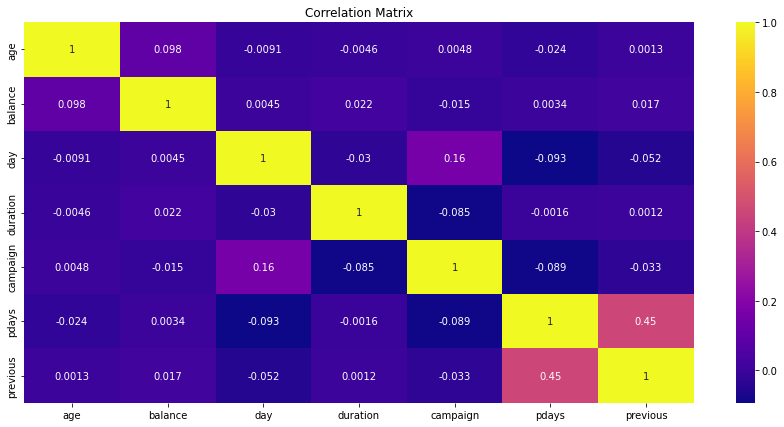

In [14]:
# Multivariate analysis using a correlation matrix
plt.figure(figsize=(15,7))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='plasma')
plt.title('Correlation Matrix')
plt.show()

In [15]:
#One-HOT Encoding for Categorical Variables
data = pd.get_dummies(data, columns = ['job', 'marital', 'education', 'contact', 'poutcome'])
data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,no,29,yes,no,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,no,2,yes,yes,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,no,1506,yes,no,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,no,1,no,no,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,no,1729,no,no,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,no,5715,no,no,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,no,668,no,no,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [16]:
#Custom Binary Encoding of Binary output variables
data['default'] = np.where(data['default'].str.contains('yes'), 1, 0)
data['housing'] = np.where(data['housing'].str.contains('yes'), 1, 0)
data['loan'] = np.where(data['loan'].str.contains('yes'), 1, 0)
data['y'] = np.where(data['y'].str.contains('yes'), 1, 0)
data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,may,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,may,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,nov,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [17]:
data['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

Text(0.5, 1.0, 'Month')

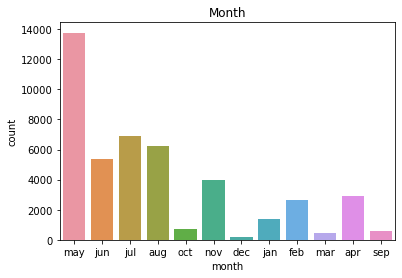

In [18]:
sns.countplot(x='month', data=data)
plt.title('Month')

In [19]:
dict1 = {'month': {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}}
data = data.replace(dict1)
data

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,0,1,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,...,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,11,508,4,-1,...,1,0,0,0,1,0,0,0,0,1


In [20]:
data.corr()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,0.092903,-0.004648,0.004760,-0.023758,...,-0.093979,-0.081629,0.069665,-0.068375,0.170349,-0.020132,-0.004927,-0.022967,0.035526,-0.000816
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,0.014989,-0.010021,0.016822,-0.029979,...,0.013220,-0.015239,-0.001236,-0.010061,-0.017208,0.019933,-0.026389,-0.014445,-0.023344,0.039490
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.094605,0.021560,-0.014578,0.003435,...,-0.069937,0.084001,0.011181,0.015880,0.037999,-0.037331,0.011857,0.008466,0.035240,-0.030271
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,-0.173887,0.005075,-0.023599,0.124178,...,0.101659,-0.099175,-0.047595,-0.156071,-0.080822,0.208409,0.106795,0.039710,-0.091360,-0.063755
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,0.021638,-0.012412,0.009980,-0.022754,...,0.070625,-0.045940,-0.049992,0.013604,-0.013183,-0.007211,-0.002186,-0.009099,-0.053713,0.031406
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,0.101989,-0.030206,0.162490,-0.093044,...,-0.005831,0.021730,0.000114,0.020186,0.023652,-0.034103,-0.068700,-0.032952,-0.030321,0.086256
month,0.092903,0.014989,0.094605,-0.173887,0.021638,0.101989,1.000000,-0.011866,0.054868,-0.108940,...,-0.049881,0.082121,-0.015071,0.153677,0.037628,-0.182490,-0.055958,-0.062626,0.033700,0.061391
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,-0.011866,1.000000,-0.084570,-0.001565,...,0.002084,0.000891,-0.000682,0.025543,-0.023201,-0.014379,-0.018925,-0.001958,0.042389,-0.003491
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,0.054868,-0.084570,1.000000,-0.088628,...,-0.020893,0.012866,0.005704,-0.032271,0.053895,0.004853,-0.088131,-0.020107,-0.057486,0.107965
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.108940,-0.001565,-0.088628,1.000000,...,0.022105,-0.007568,-0.006907,0.225996,0.016006,-0.247068,0.701052,0.389791,0.228539,-0.869962


<AxesSubplot:>

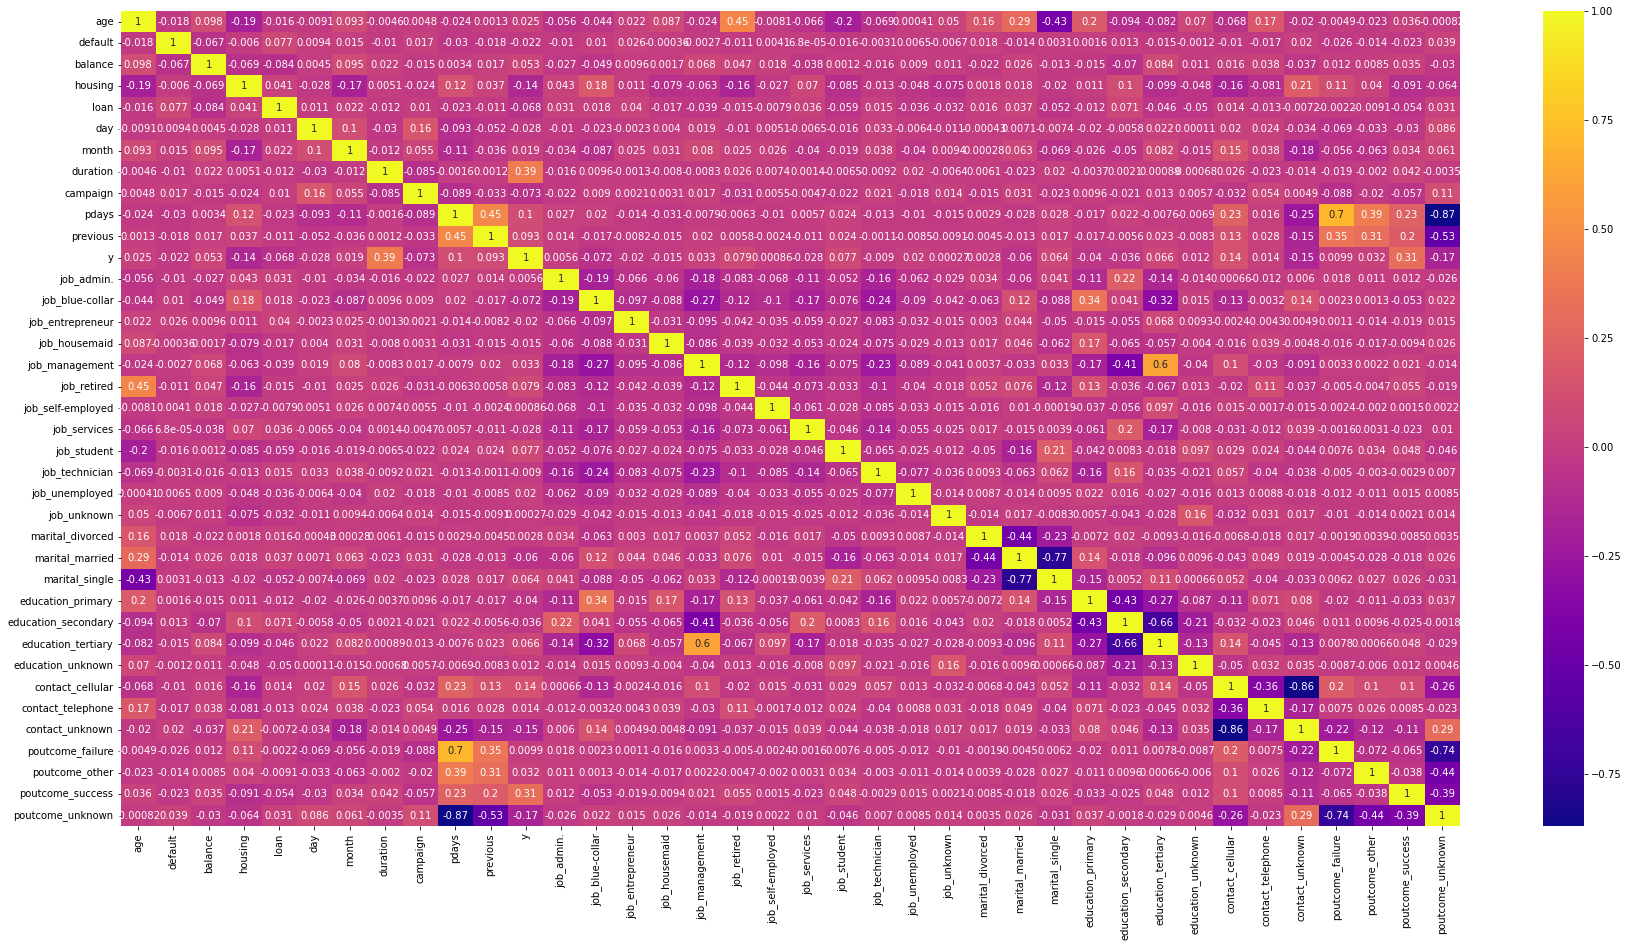

In [21]:
fig = plt.figure(figsize = (30, 15))
sns.heatmap(data.corr(), annot = True, cmap='plasma')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int32
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int32
 4   loan                 45211 non-null  int32
 5   day                  45211 non-null  int64
 6   month                45211 non-null  int64
 7   duration             45211 non-null  int64
 8   campaign             45211 non-null  int64
 9   pdays                45211 non-null  int64
 10  previous             45211 non-null  int64
 11  y                    45211 non-null  int32
 12  job_admin.           45211 non-null  uint8
 13  job_blue-collar      45211 non-null  uint8
 14  job_entrepreneur     45211 non-null  uint8
 15  job_housemaid        45211 non-null  uint8
 16  job_management       4

Text(0.5, 1.0, 'Scatter Plot for Age and Balance with Target Variable (y)')

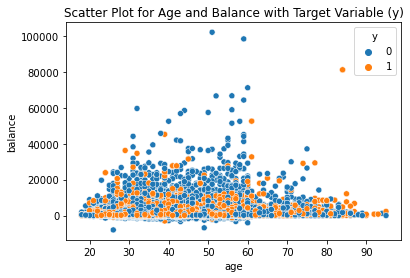

In [23]:
sns.scatterplot(x='age', y='balance', hue='y', data=data)
plt.title('Scatter Plot for Age and Balance with Target Variable (y)')

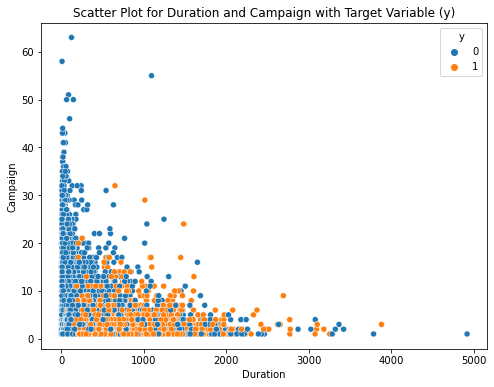

In [24]:
# Scatter plot for 'duration' and 'campaign' with 'y' variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='campaign', hue='y', data=data)
plt.title('Scatter Plot for Duration and Campaign with Target Variable (y)')
plt.xlabel('Duration')
plt.ylabel('Campaign')
plt.show()

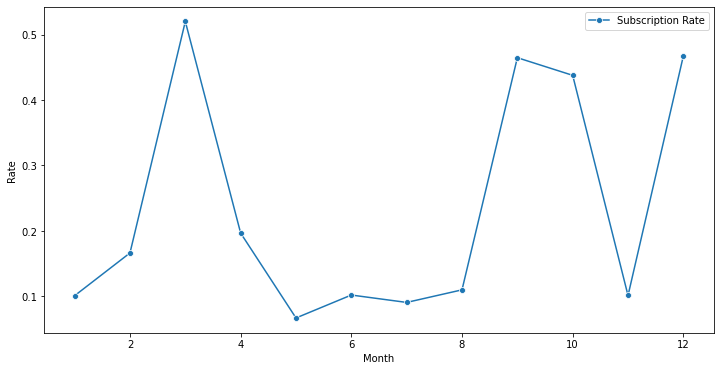

In [25]:
# Line plot for subscription and contact rates by month
plt.figure(figsize=(12, 6))

# Subscription rate by month
sns.lineplot(x='month', y='y', data=data.groupby('month')['y'].mean().reset_index(), marker='o', label='Subscription Rate')

plt.xlabel('Month')
plt.ylabel('Rate')
plt.legend()
plt.show()

# Model Building

In [26]:
#Dividing data into input and output variables
X = pd.concat([data.iloc[:,0:11], data.iloc[:,12:]], axis = 1)
Y = data.iloc[:,11]

In [27]:
#Logistic regression model and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

## Model Predictions

In [28]:
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
y_pred_df = pd.DataFrame({'Actual_y': Y, 'Predicted_prob': y_pred})
y_pred_df

,Actual_y,Predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


# Testing Model Accuracy

In [30]:
#confusion matrix for the model accuracy
confusion_matrix = confusion_matrix(Y, y_pred)
confusion_matrix

array([[39163,   759],
       [ 4118,  1171]], dtype=int64)

In [31]:
classifier.predict_proba(X)[:,1]

array([0.04716947, 0.02350107, 0.01540947, ..., 0.78776373, 0.08357057,
       0.18731333])

In [32]:
#The model accuracy is calculated by (a+d)/(a+b+c+d)
(39163+1171)/(39163+759+4118+1171)

0.8921280219415629

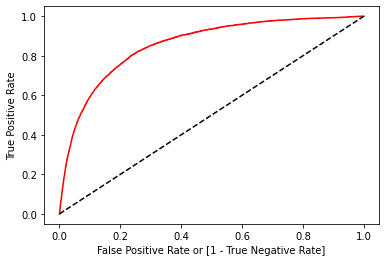

The auc accuracy:  0.601195419080063


In [33]:
fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
auc = roc_auc_score(Y, y_pred)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()
print('The auc accuracy: ', auc)